# **GiT Clone**

GiT Clone used to load the Images and CSV Files

In [1]:
!git clone https://github.com/lexparikesit/Self-Driving-Cars-with-Udacity-Sim.git

Cloning into 'Self-Driving-Cars-with-Udacity-Sim'...
remote: Enumerating objects: 29366, done.
remote: Total 29366 (delta 0), reused 0 (delta 0), pack-reused 29366
Receiving objects: 100% (29366/29366), 427.54 MiB | 19.57 MiB/s, done.
Resolving deltas: 100% (1/1), done.
Updating files: 100% (29368/29368), done.


# **Importing Libraries**

In [ ]:
!pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install imgaug

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import os
import ntpath
import random

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import keras
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Convolution2D, MaxPooling2D, Dropout, Flatten, Dense
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split 
from imgaug import augmenters as iaa

# **Upload the File that Needed**

In [4]:
directory = 'Self-Driving-Cars-with-Udacity-Sim'
df = pd.read_csv(os.path.join(directory, 'driving_log.csv'), 
                 names=['center','left','right','steering','throttle',
                          'reverse','speed'])
df.head()

,center,left,right,steering,throttle,reverse,speed
0,C:\Users\user\Documents\Language Programming\P...,C:\Users\user\Documents\Language Programming\P...,C:\Users\user\Documents\Language Programming\P...,0.0,0.0,0.0,0.000001
1,C:\Users\user\Documents\Language Programming\P...,C:\Users\user\Documents\Language Programming\P...,C:\Users\user\Documents\Language Programming\P...,0.0,0.0,0.0,0.000021
2,C:\Users\user\Documents\Language Programming\P...,C:\Users\user\Documents\Language Programming\P...,C:\Users\user\Documents\Language Programming\P...,0.0,0.0,0.0,0.000015
3,C:\Users\user\Documents\Language Programming\P...,C:\Users\user\Documents\Language Programming\P...,C:\Users\user\Documents\Language Programming\P...,0.0,0.0,0.0,0.000005
4,C:\Users\user\Documents\Language Programming\P...,C:\Users\user\Documents\Language Programming\P...,C:\Users\user\Documents\Language Programming\P...,0.0,0.0,0.0,0.000010


In [5]:
pd.set_option('display.max_colwidth', -1)
df.head()

<ipython-input-5-8924a054d440>:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


,center,left,right,steering,throttle,reverse,speed
0,C:\Users\user\Documents\Language Programming\Python\Self Driving Cars Project (with Udacity)\Dataset 2\IMG\center_2023_02_26_18_59_57_510.jpg,C:\Users\user\Documents\Language Programming\Python\Self Driving Cars Project (with Udacity)\Dataset 2\IMG\left_2023_02_26_18_59_57_510.jpg,C:\Users\user\Documents\Language Programming\Python\Self Driving Cars Project (with Udacity)\Dataset 2\IMG\right_2023_02_26_18_59_57_510.jpg,0.0,0.0,0.0,0.000001
1,C:\Users\user\Documents\Language Programming\Python\Self Driving Cars Project (with Udacity)\Dataset 2\IMG\center_2023_02_26_18_59_57_592.jpg,C:\Users\user\Documents\Language Programming\Python\Self Driving Cars Project (with Udacity)\Dataset 2\IMG\left_2023_02_26_18_59_57_592.jpg,C:\Users\user\Documents\Language Programming\Python\Self Driving Cars Project (with Udacity)\Dataset 2\IMG\right_2023_02_26_18_59_57_592.jpg,0.0,0.0,0.0,0.000021
2,C:\Users\user\Documents\Language Programming\Python\Self Driving Cars Project (with Udacity)\Dataset 2\IMG\center_2023_02_26_18_59_57_662.jpg,C:\Users\user\Documents\Language Programming\Python\Self Driving Cars Project (with Udacity)\Dataset 2\IMG\left_2023_02_26_18_59_57_662.jpg,C:\Users\user\Documents\Language Programming\Python\Self Driving Cars Project (with Udacity)\Dataset 2\IMG\right_2023_02_26_18_59_57_662.jpg,0.0,0.0,0.0,0.000015
3,C:\Users\user\Documents\Language Programming\Python\Self Driving Cars Project (with Udacity)\Dataset 2\IMG\center_2023_02_26_18_59_57_739.jpg,C:\Users\user\Documents\Language Programming\Python\Self Driving Cars Project (with Udacity)\Dataset 2\IMG\left_2023_02_26_18_59_57_739.jpg,C:\Users\user\Documents\Language Programming\Python\Self Driving Cars Project (with Udacity)\Dataset 2\IMG\right_2023_02_26_18_59_57_739.jpg,0.0,0.0,0.0,0.000005
4,C:\Users\user\Documents\Language Programming\Python\Self Driving Cars Project (with Udacity)\Dataset 2\IMG\center_2023_02_26_18_59_57_817.jpg,C:\Users\user\Documents\Language Programming\Python\Self Driving Cars Project (with Udacity)\Dataset 2\IMG\left_2023_02_26_18_59_57_817.jpg,C:\Users\user\Documents\Language Programming\Python\Self Driving Cars Project (with Udacity)\Dataset 2\IMG\right_2023_02_26_18_59_57_817.jpg,0.0,0.0,0.0,0.000010


In [6]:
def path_split(path):
    head, tail = ntpath.split(path)
    return tail

In [7]:
df['center'] = df['center'].apply(path_split)
df['left'] = df['left'].apply(path_split)
df['right'] = df['right'].apply(path_split)

In [8]:
df.head()

,center,left,right,steering,throttle,reverse,speed
0,center_2023_02_26_18_59_57_510.jpg,left_2023_02_26_18_59_57_510.jpg,right_2023_02_26_18_59_57_510.jpg,0.0,0.0,0.0,0.000001
1,center_2023_02_26_18_59_57_592.jpg,left_2023_02_26_18_59_57_592.jpg,right_2023_02_26_18_59_57_592.jpg,0.0,0.0,0.0,0.000021
2,center_2023_02_26_18_59_57_662.jpg,left_2023_02_26_18_59_57_662.jpg,right_2023_02_26_18_59_57_662.jpg,0.0,0.0,0.0,0.000015
3,center_2023_02_26_18_59_57_739.jpg,left_2023_02_26_18_59_57_739.jpg,right_2023_02_26_18_59_57_739.jpg,0.0,0.0,0.0,0.000005
4,center_2023_02_26_18_59_57_817.jpg,left_2023_02_26_18_59_57_817.jpg,right_2023_02_26_18_59_57_817.jpg,0.0,0.0,0.0,0.000010


# **Balancing the Data and Visualize Them**

[-1.   -0.92 -0.84 -0.76 -0.68 -0.6  -0.52 -0.44 -0.36 -0.28 -0.2  -0.12
 -0.04  0.04  0.12  0.2   0.28  0.36  0.44  0.52  0.6   0.68  0.76  0.84
  0.92  1.  ]
/n


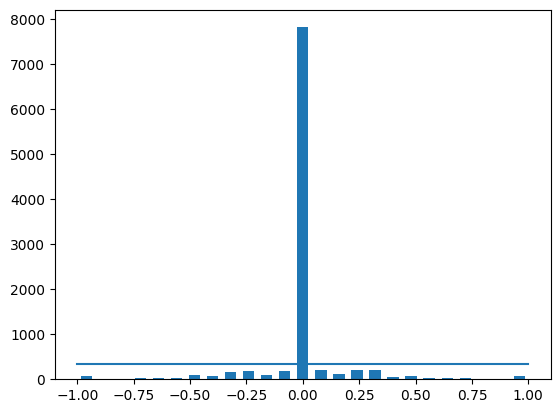

In [9]:
num_bins = 25
threshold = 350
hist, bins = np.histogram(df['steering'], num_bins)
print(bins)
print('/n')
center = (bins[:-1] + bins[1:]) * 0.5
plt.bar(center, hist, width=0.05)
plt.plot((np.min(df['steering']), 
          np.max(df['steering'])), (threshold, threshold))

total data:  9789
removed:  7464
remaining:  2325


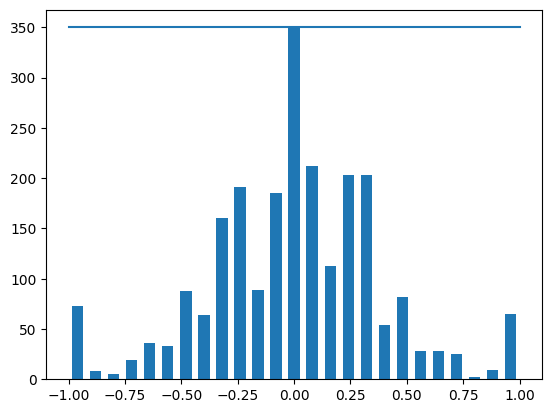

In [10]:
print('total data: ', len(df))
remove_list = []
for j in range(num_bins):
    new_list = []
    for i in range(len(df['steering'])):
        if df['steering'][i] >= bins[j] and df['steering'][i] <= bins[j+1]:
            new_list.append(i)
    new_list = shuffle(new_list)
    new_list = new_list[threshold:]
    remove_list.extend(new_list)

print('removed: ', len(remove_list))
df.drop(df.index[remove_list], inplace=True)
print('remaining: ', len(df))

hist, bins2 = np.histogram(df['steering'], (num_bins))
plt.bar(center, hist, width=0.05)
plt.plot((np.min(df['steering']), 
          np.max(df['steering'])), (threshold, threshold))

# **Splitting the Data into Test and Validation**

In [11]:
print(df.iloc[1])
def load_img(directory, data_frame):
    image_path = []
    steering = []
    for i in range(len(df)):
        index_data = df.iloc[i]
        center, left, right = index_data[0], index_data[1], index_data[2]
            #center images
        image_path.append(os.path.join(directory, center.strip()))
        steering.append(float(index_data[3]))
            #left images
        image_path.append(os.path.join(directory, left.strip()))
        steering.append(float(index_data[3] + 0.15))
            #right images
        image_path.append(os.path.join(directory, right.strip()))
        steering.append(float(index_data[3] - 0.15))
    
    paths = np.asarray(image_path)
    steering_angle = np.asarray(steering)

    return paths, steering_angle

center      center_2023_02_26_18_59_59_730.jpg
left        left_2023_02_26_18_59_59_730.jpg  
right       right_2023_02_26_18_59_59_730.jpg 
steering   -0.25                              
throttle    1.0                               
reverse     0.0                               
speed       12.01738                          
Name: 29, dtype: object


In [12]:
paths, steering_angle = load_img(directory + '/IMG', df)
X_train, X_valid, y_train, y_valid = train_test_split(paths, 
                                                      steering_angle,
                                                      test_size=0.2,
                                                      random_state=6)

print('Training Samples: {}\nValid Samples: {}'.format(len(X_train), 
                                                       len(X_valid)))

Training Samples: 5580
Valid Samples: 1395


Text(0.5, 1.0, 'Validation set')

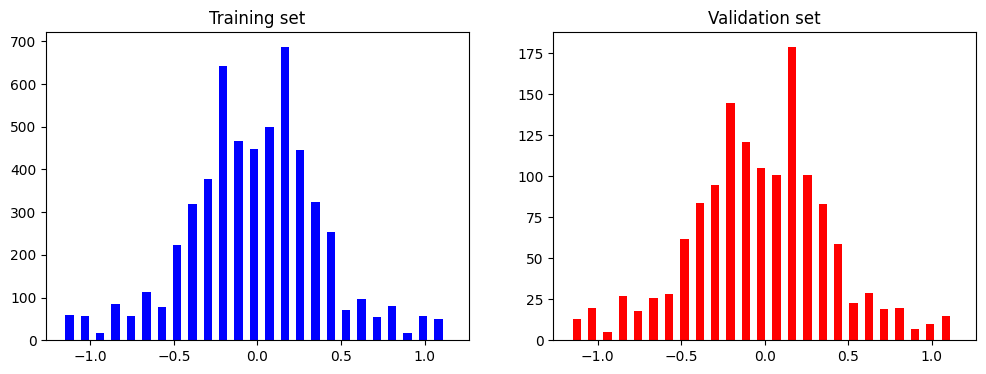

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].hist(y_train, bins=num_bins, width=0.05, color='blue')
axes[0].set_title('Training set')
axes[1].hist(y_valid, bins=num_bins, width=0.05, color='red')
axes[1].set_title('Validation set')

# **Augmented Images Technique**

**Zooming**

In [14]:
def zoom(image):
    zoom = iaa.Affine(scale=(1, 1.3))
    image = zoom.augment_image(image)
    return image

Text(0.5, 1.0, 'Zoomed Image')

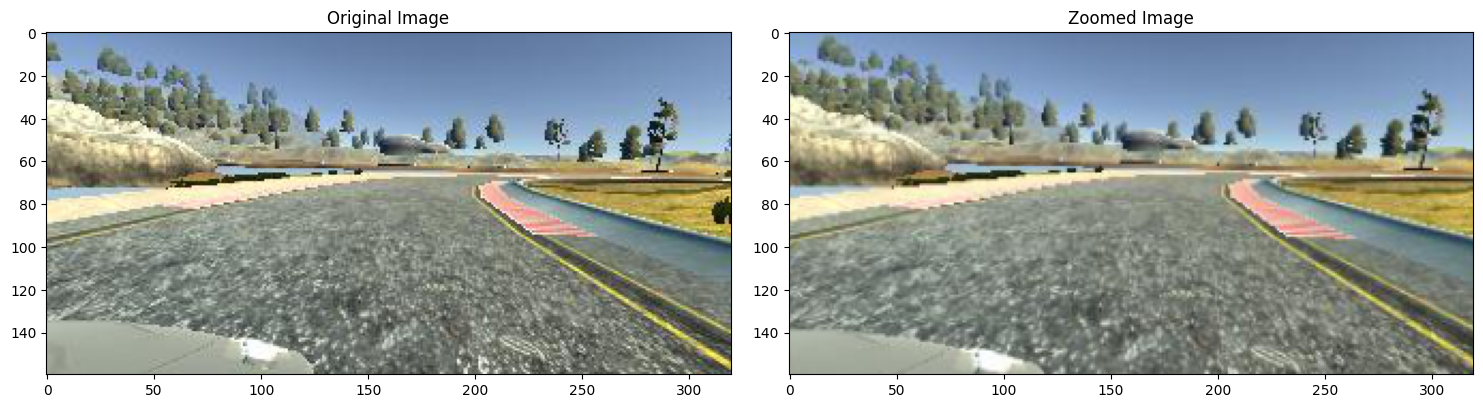

In [15]:
image = paths[random.randint(0, 1000)]
original_image = mpimg.imread(image)
zoom_image = zoom(original_image)

fig, axis = plt.subplots(1, 2, figsize=(15,10))
fig.tight_layout()

axis[0].imshow(original_image)
axis[0].set_title('Original Image')

axis[1].imshow(zoom_image)
axis[1].set_title('Zoomed Image')

**Pan**

In [16]:
def pan(image):
    pan = iaa.Affine(translate_percent = {'x':(-0.1, 0.1),
                                          'y':(-0.1, 0.1)})
    image = pan.augment_image(image)
    return image

Text(0.5, 1.0, 'Panned Image')

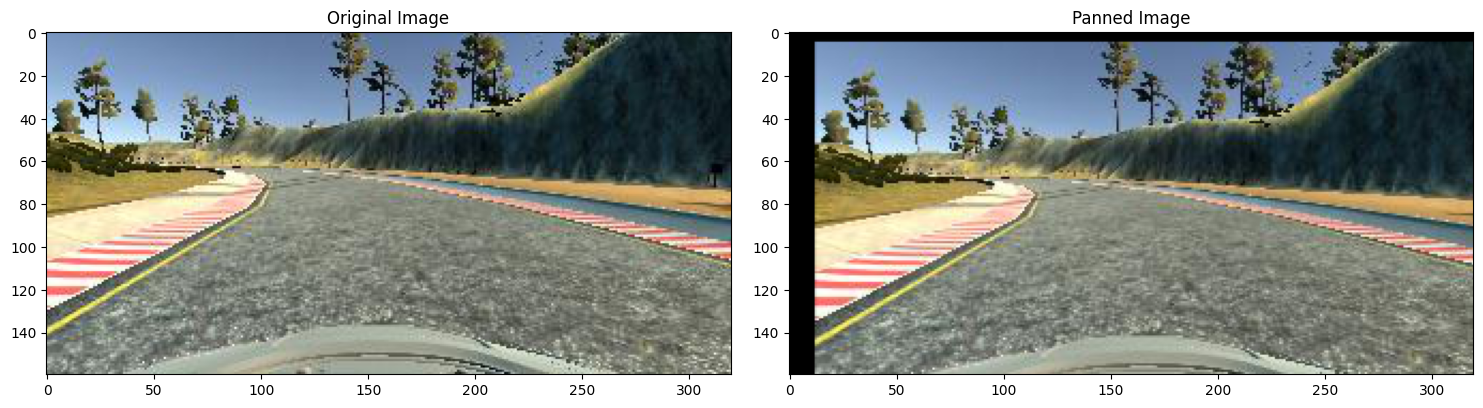

In [17]:
image = paths[random.randint(0, 1000)]
original_image = mpimg.imread(image)
pan_image = pan(original_image)

fig, axis = plt.subplots(1, 2, figsize=(15,10))
fig.tight_layout()

axis[0].imshow(original_image)
axis[0].set_title('Original Image')

axis[1].imshow(pan_image)
axis[1].set_title('Panned Image')

**Random Brightness**

In [18]:
def random_brightness(image):
    image_brightness = iaa.Multiply((0.2, 1.2))
    image = image_brightness.augment_image(image)
    return image

Text(0.5, 1.0, 'Brightness Altered Image')

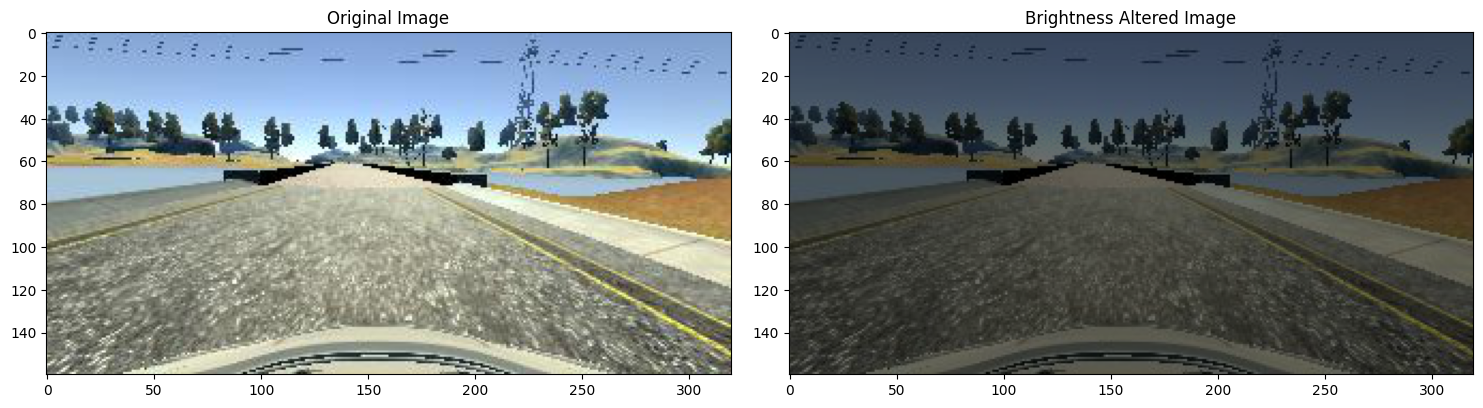

In [19]:
image = paths[random.randint(0, 1000)]
original_image = mpimg.imread(image)
brightness_image = random_brightness(original_image)

fig, axis = plt.subplots(1, 2, figsize=(15,10))
fig.tight_layout()

axis[0].imshow(original_image)
axis[0].set_title('Original Image')

axis[1].imshow(brightness_image)
axis[1].set_title('Brightness Altered Image')

**Random Flip**

In [20]:
def random_flip(image, steering):
    image = cv2.flip(image, 1)
    steering = -steering
    return image, steering

Text(0.5, 1.0, 'Flipped Image -Steering Angle:-0.05')

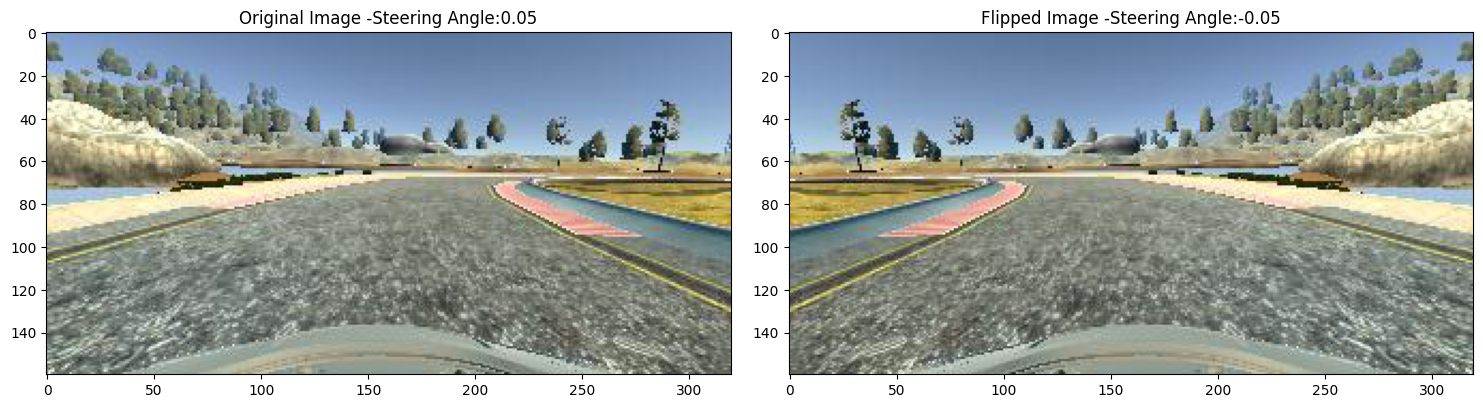

In [21]:
random_index = random.randint(0, 1000)
image = paths[random_index]
steering = steering_angle[random_index]
original_image = mpimg.imread(image)
flipped_image, flipped_steering = random_flip(original_image, steering)

fig, axis = plt.subplots(1, 2, figsize=(15,10))
fig.tight_layout()

axis[0].imshow(original_image)
axis[0].set_title('Original Image -' + 
                  'Steering Angle:' + str(steering))

axis[1].imshow(flipped_image)
axis[1].set_title('Flipped Image -' + 
                  'Steering Angle:' + str(flipped_steering))

In [22]:
def random_augment(image, steering):
    image = mpimg.imread(image)

    if np.random.rand() < 0.5:
        image = zoom(image)
    if np.random.rand() < 0.5:
        image = pan(image)
    if np.random.rand() < 0.5:
        image = random_brightness(image)
    if np.random.rand() < 0.5:
        image, steering = random_flip(image, steering)
    
    return image, steering

In [23]:
ncols = 2
nrows = 10

fig, axis = plt.subplots(nrows, ncols, figsize=(15,50))
fig.tight_layout()

for i in range(10):
    rand_num = random.randint(0, len(paths) - 1)
    random_image = paths[rand_num]
    random_steering = steering_angle[rand_num]

    original_image = mpimg.imread(random_image)
    augmented_image, steering_agl = random_augment(random_image,
                                                random_steering)

    axis[i][0].imshow(original_image)
    axis[i][0].set_title('Original Image')

    axis[i][1].imshow(augmented_image)
    axis[i][1].set_title("Augmented Image")

Output hidden; open in https://colab.research.google.com to view.

# **Preprocessing Images**

In [24]:
def image_processing(img):
    img = img[60:135, :, :]
    img = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
    img = cv2.GaussianBlur(img, (3, 3), 0)
    img = cv2.resize(img, (200, 66))
    img = img/255
    return img

Text(0.5, 1.0, 'Processing Images')

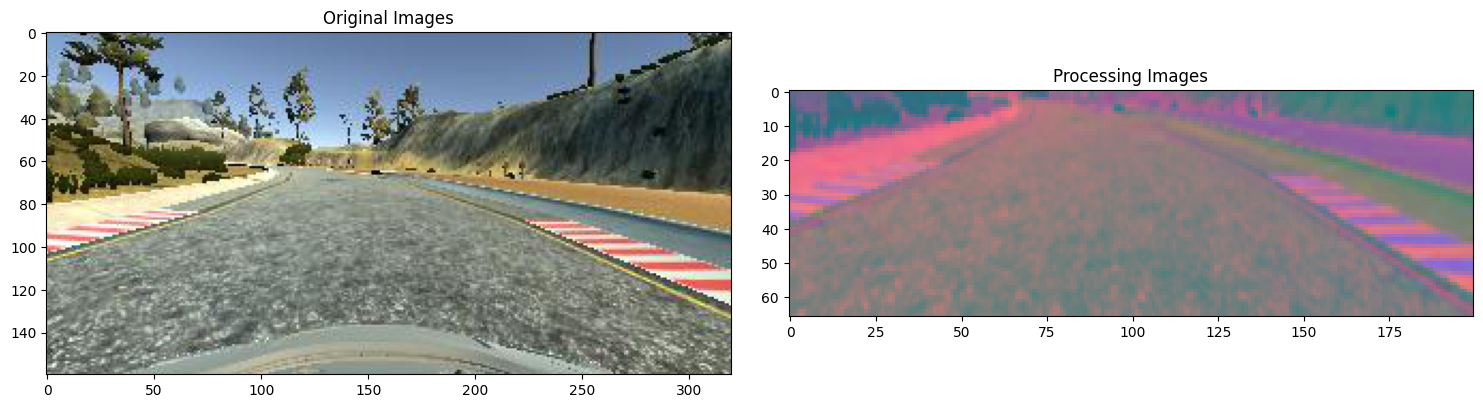

In [25]:
image = paths[60]
original_image = mpimg.imread(image)
preprocess_image = image_processing(original_image)

fig, axis = plt.subplots(1, 2, figsize=(15,10))
fig.tight_layout()

axis[0].imshow(original_image)
axis[0].set_title('Original Images')

axis[1].imshow(preprocess_image)
axis[1].set_title('Processing Images')

# **Batch Generator**

In [26]:
def batch_generator(paths, steering_ang, batch_size, istraining):
    while True:
        batch_img = []
        batch_steering = []

        for i in range(batch_size):
            random_index = random.randint(0, len(paths) - 1)

            if istraining:
                im, steering = random_augment(paths[random_index],
                                              steering_ang[random_index])
            else:
                im = mpimg.imread(paths[random_index])
                steering = steering_ang[random_index]
        
            im = image_processing(im)
            batch_img.append(im)
            batch_steering.append(steering)
    
        yield (np.asarray(batch_img), np.asarray(batch_steering))

Text(0.5, 1.0, 'Validation_image')

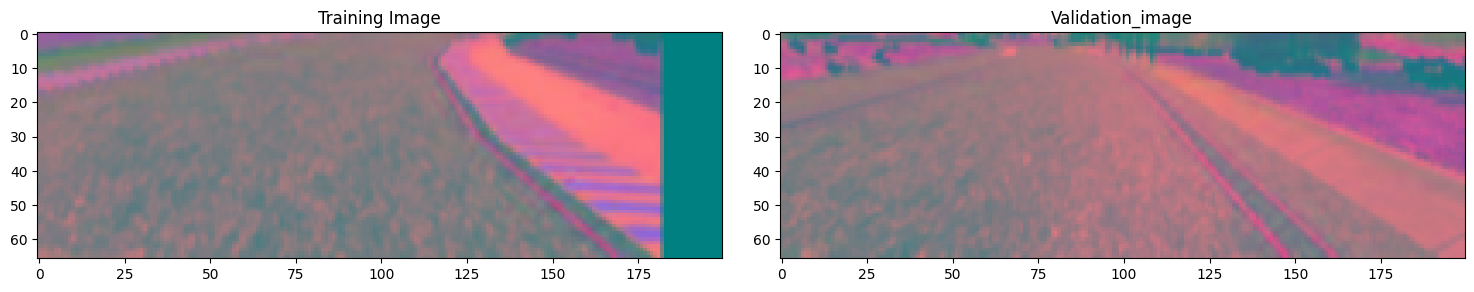

In [27]:
x_train_gen, y_train_gen = next(batch_generator(X_train, y_train, 1, 1))
x_valid_gen, y_valid_gen = next(batch_generator(X_valid, y_valid, 1, 0))

fig, axis = plt.subplots(1, 2, figsize=(15,10))
fig.tight_layout()

axis[0].imshow(x_train_gen[0])
axis[0].set_title('Training Image')

axis[1].imshow(x_valid_gen[0])
axis[1].set_title('Validation_image')

# **NVIDIA CNN Architecture - End to End**

In [28]:
def cnn_model():
    model = Sequential()
    model.add(Convolution2D(24, (5, 5), strides=(2, 2), 
              input_shape=(66, 200, 3), activation='elu'))
    model.add(Convolution2D(36, (5, 5), strides=(2, 2), activation='elu'))
    model.add(Convolution2D(48, (5, 5), strides=(2, 2), activation='elu'))
    model.add(Convolution2D(64, (3, 3), activation='elu'))
    model.add(Convolution2D(64, (3, 3), activation='elu'))

    model.add(Flatten())

    model.add(Dense(100, activation='elu'))

    model.add(Dense(50, activation='elu'))

    model.add(Dense(10, activation='elu'))
    
    model.add(Dense(1))

    optimizer = Adam(learning_rate=1e-3)

    model.compile(loss='mse', optimizer=optimizer)

    return model

In [29]:
model = cnn_model()
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 31, 98, 24)        1824      
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 47, 36)        21636     
                                                                 
 conv2d_2 (Conv2D)           (None, 5, 22, 48)         43248     
                                                                 
 conv2d_3 (Conv2D)           (None, 3, 20, 64)         27712     
                                                                 
 conv2d_4 (Conv2D)           (None, 1, 18, 64)         36928     
                                                                 
 flatten (Flatten)           (None, 1152)              0         
                                                                 
 dense (Dense)               (None, 100)               1

In [30]:
history = model.fit_generator(batch_generator(X_train, y_train, 250, 1),
                              steps_per_epoch=350, epochs=16,
                              validation_data=batch_generator(X_valid,
                                                              y_valid,
                                                              150, 0), 
                              validation_steps=250, verbose=1, shuffle=1)

<ipython-input-30-8390a6a4399a>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(batch_generator(X_train, y_train, 250, 1),


Epoch 1/16
350/350 [==============================] - 379s 1s/step - loss: 0.1652 - val_loss: 0.0971
Epoch 2/16
350/350 [==============================] - 366s 1s/step - loss: 0.1004 - val_loss: 0.0759
Epoch 3/16
350/350 [==============================] - 367s 1s/step - loss: 0.0815 - val_loss: 0.0646
Epoch 4/16
350/350 [==============================] - 381s 1s/step - loss: 0.0705 - val_loss: 0.0699
Epoch 5/16
350/350 [==============================] - 365s 1s/step - loss: 0.0652 - val_loss: 0.0652
Epoch 6/16
350/350 [==============================] - 365s 1s/step - loss: 0.0591 - val_loss: 0.0610
Epoch 7/16
350/350 [==============================] - 383s 1s/step - loss: 0.0566 - val_loss: 0.0555
Epoch 8/16
350/350 [==============================] - 365s 1s/step - loss: 0.0545 - val_loss: 0.0502
Epoch 9/16
350/350 [==============================] - 380s 1s/step - loss: 0.0527 - val_loss: 0.0488
Epoch 10/16
350/350 [==============================] - 380s 1s/step - loss: 0.0505 - val_lo

Text(0.5, 0, 'Epoch')

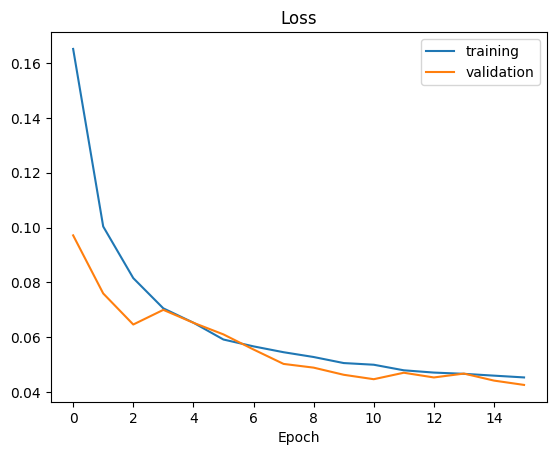

In [31]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title('Loss')
plt.xlabel('Epoch')

In [32]:
model.save('model.h5')
from google.colab import files
files.download('model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>